Join the data from Part 1 with the data from Part 2 to create a new dataframe.

### DataFrame- CityBike

In [13]:
import pandas as pd
import requests
import os
import json
import numpy as np
import matplotlib.pyplot as plt

df_citybike = import pandas as pd
import statsmodels.api as sm

# Assuming 'combined_df' is your DataFrame containing the 'Distance' and 'Number of Bikes' columns
X = combined_df[['Distance']]
y = combined_df['Number of Bikes']

# Add a constant term to the independent variable(s)
X = sm.add_constant(X)

# Create and fit the linear regression model
regression_model = sm.OLS(y, X)
regression_results = regression_model.fit()

# Print the regression results summary
print(regression_results.summary())
df_citybike.rename(columns={'Latitude': 'Lat_Station', 'Longitude': 'Lon_Station'}, inplace=True)
print(df_citybike)


                       Station Name  Lat_Station  Lon_Station  Number_of_Bikes
0                      Hess at king    43.259126   -79.877212               12
1                     Bayfront Park    43.269288   -79.871327                2
2                   Bay at Strachan    43.267859   -79.867923                7
3                   Bay at Mulberry    43.263198   -79.871803                3
4                         City Hall    43.256132   -79.874499                8
..                              ...          ...          ...              ...
139  Westinghouse at Barton - ERI13    43.258319   -79.842406                4
140              James at Colbourne    43.263777   -79.866042                2
141                Main at Longwood    43.259604   -79.902103                4
142                     Van Wagners    43.260008   -79.766388                6
143           King William at James    43.257635   -79.868487                4

[144 rows x 4 columns]


### DataFrame - Foursquare

In [5]:
df_foursquare = pd.read_csv('C:/users/simon/foursquare.csv')
df_foursquare.rename(columns={'Longitude': 'Lon_PoI', 'Latitude': 'Lat_PoI'}, inplace=True)
print(df_foursquare)

                  Name    Lon_PoI    Lat_PoI  Distance
0                  Bar -79.866884  43.260862       840
1                  Bar -79.866249  43.262589       849
2                  Bar -79.866884  43.260862       768
3                  Bar -79.866884  43.260862       452
4                  Bar -79.866884  43.260862       802
..                 ...        ...        ...       ...
104  Elementary School -79.892859  43.252706       550
105                Bar -79.866884  43.260862       729
106         Night Club -79.865886  43.263456       961
107       Cocktail Bar -79.817846  43.247739       471
108           Dive Bar -79.848996  43.249934       380

[109 rows x 4 columns]


In [41]:
df_citybike = df_citybike.reset_index(drop=True)
df_foursquare = df_foursquare.reset_index(drop=True)
#combined_df =df_citybike.join(df_foursquare)
combined_df = pd.concat([df_citybike, df_foursquare], axis=1)
combined_df
%store combined_df
print(combined_df)

Stored 'combined_df' (DataFrame)
                       Station Name  Lat_Station  Lon_Station  \
0                      Hess at king    43.259126   -79.877212   
1                     Bayfront Park    43.269288   -79.871327   
2                   Bay at Strachan    43.267859   -79.867923   
3                   Bay at Mulberry    43.263198   -79.871803   
4                         City Hall    43.256132   -79.874499   
..                              ...          ...          ...   
139  Westinghouse at Barton - ERI13    43.258319   -79.842406   
140              James at Colbourne    43.263777   -79.866042   
141                Main at Longwood    43.259604   -79.902103   
142                     Van Wagners    43.260008   -79.766388   
143           King William at James    43.257635   -79.868487   

     Number_of_Bikes Name    Lon_PoI    Lat_PoI  Distance  
0                 12  Bar -79.866884  43.260862     840.0  
1                  2  Bar -79.866249  43.262589     849.0  
2     

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [35]:
missing_values = combined_df.isna()
missing_values
missing_counts = missing_values.sum()
missing_counts

Station Name        0
Lat_Station         0
Lon_Station         0
Number_of_Bikes     0
Name               35
Lon_PoI            35
Lat_PoI            35
Distance           35
dtype: int64

In [36]:
combined_df = combined_df.replace('missing_values', np.nan)

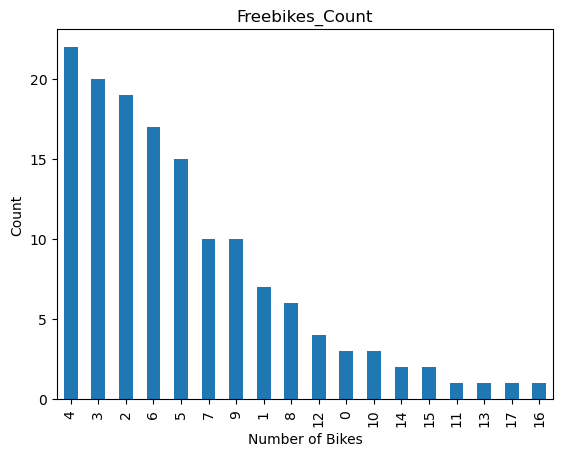

In [37]:
import numpy as np

import matplotlib.pyplot as plt

combined_df['Number_of_Bikes'].value_counts().plot(kind='bar')
plt.xlabel('Number of Bikes')
plt.ylabel('Count')
plt.title('Freebikes_Count')
plt.show()


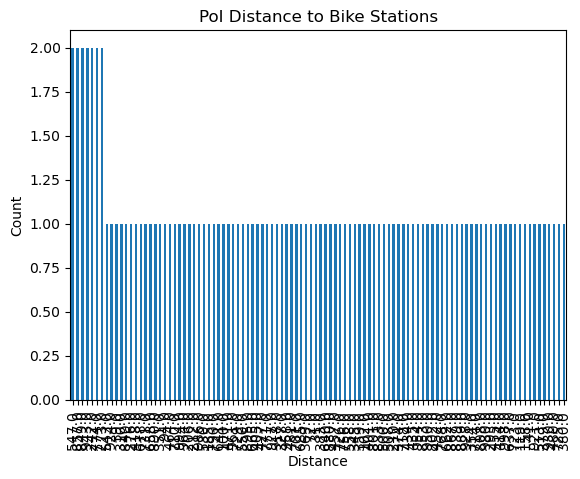

In [38]:
combined_df['Distance'].value_counts().plot(kind='bar')
plt.xlabel('Distance')
plt.ylabel('Count')
plt.title('PoI Distance to Bike Stations')
plt.show()

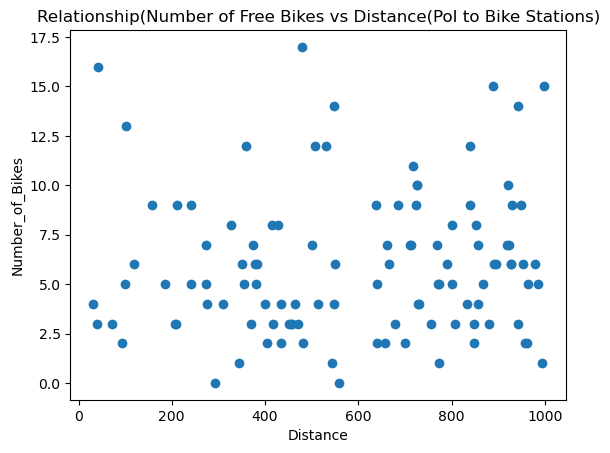

In [17]:
plt.scatter(combined_df['Distance'], combined_df['Number_of_Bikes'])
plt.xlabel('Distance')
plt.ylabel('Number_of_Bikes')
plt.title('Relationship(Number of Free Bikes vs Distance(PoI to Bike Stations)')
plt.show()

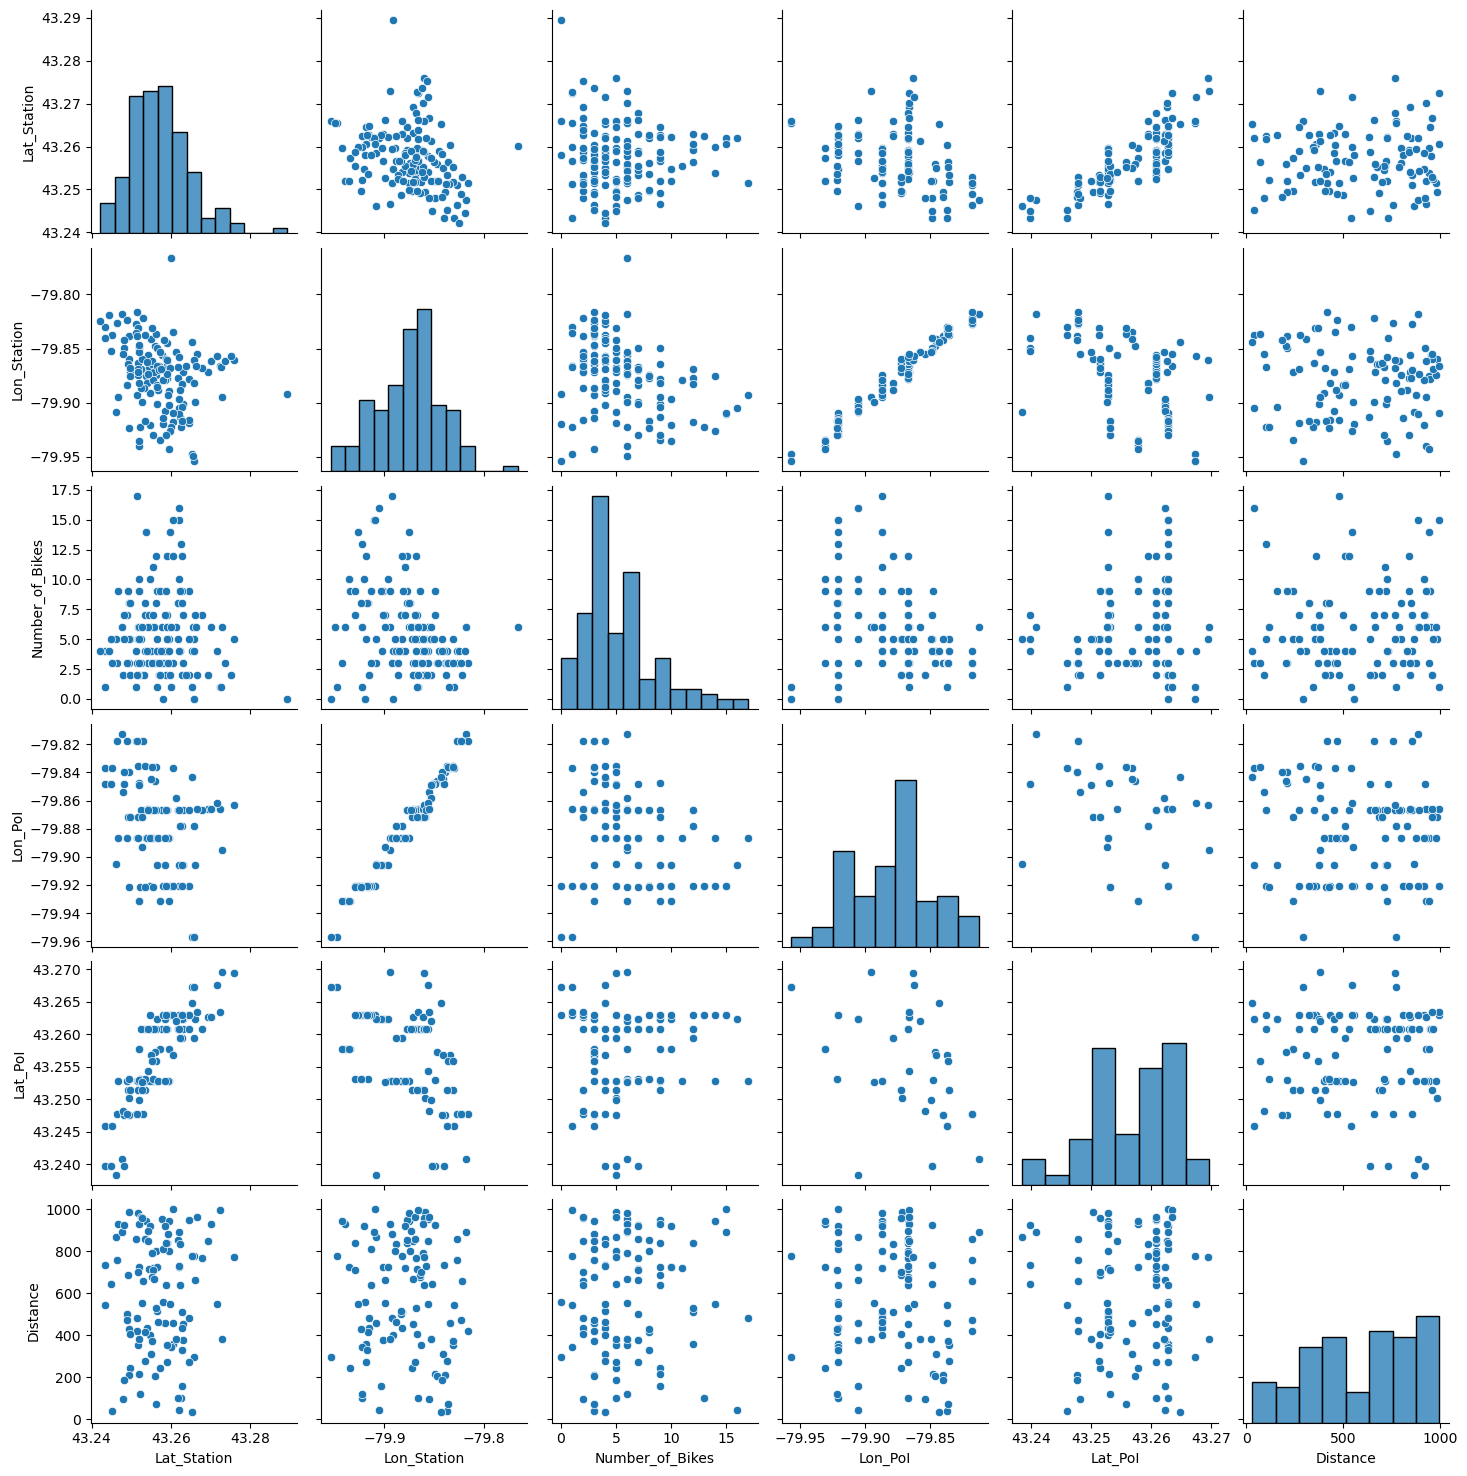

In [39]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data=combined_df)
plt.show()

##From the visualization there is no any relationship between the distance of PoI(bars, restaurants and groceries) to the bike stations.

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [ ]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('C:/users/simon/Project-Statistical-Modeling/mysqlite.db')
combined_df.to_sql('cb_fq_table', conn, index =False) #DataFrame is converted directly into SQLite3 Database
conn.commit();


Look at the data before and after the join to validate your data.